In [33]:
import pandas as pd
import plotly.express as px


**Import the Dataset**

In [34]:
df = pd.read_csv(r"../stroke_dataset.csv")
df.head()


Age     Sex  Hypertension  Heart_Disease Ever_Married     Work_Type  \
0   69    Male             0              0          Yes  Never_worked   
1   32    Male             0              1          Yes      Govt_job   
2   89  Female             0              0          Yes  Never_worked   
3   78  Female             0              0           No  Never_worked   
4   38  Female             0              0          Yes      Children   

  Residence_Type  Average_Glucose_Level    BMI Smoking_Status  \
0          Urban                 153.40  17.93      Currently   
1          Urban                 158.33  40.75      Currently   
2          Urban                  73.54  16.81       Formerly   
3          Rural                 290.89  29.79       Formerly   
4          Urban                  91.85  49.86        Unknown   

   Physical_Activity  Alcohol_Intake  Stress_Level  Blood_Pressure  \
0                 38               8          6.62             195   
1                101               0          1.38              93   
2                 43               3          2.34             133   
3                 92               2          6.13             199   
4                119               7          2.57             103   

   Cholesterol Family_History  MRI_Result  Stroke  
0          158            Yes        5.28       0  
1          232            Yes       10.81       0  
2          257             No       77.31       1  
3          211            Yes       48.68       0  
4          229            Yes       86.56       0

In [35]:
df.dtypes

Age                        int64
Sex                       object
Hypertension               int64
Heart_Disease              int64
Ever_Married              object
Work_Type                 object
Residence_Type            object
Average_Glucose_Level    float64
BMI                      float64
Smoking_Status            object
Physical_Activity          int64
Alcohol_Intake             int64
Stress_Level             float64
Blood_Pressure             int64
Cholesterol                int64
Family_History            object
MRI_Result               float64
Stroke                     int64
dtype: object

**Exploratory Data Analysis (EDA)**

In [36]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=9, cols=2,   # 16 plots → 8 rows x 2 cols
    subplot_titles=("Age", "Sex", "Hypertension", "Heart Disease",
                    "Ever Married", "Work Type", "Residence Type", "Average Glucose Level",
                    "BMI", "Smoking Status", "Physical Activity", "Alcohol Intake",
                    "Stress Level", "Blood Pressure", "Cholesterol", "Family History","Stroke"))

# Row 1
fig.add_trace(go.Histogram(x=df["Age"]), row=1, col=1)
fig.add_trace(go.Histogram(x=df["Sex"]), row=1, col=2)

# Row 2
fig.add_trace(go.Histogram(x=df["Hypertension"]), row=2, col=1)
fig.add_trace(go.Histogram(x=df["Heart_Disease"]), row=2, col=2)

# Row 3
fig.add_trace(go.Histogram(x=df["Ever_Married"]), row=3, col=1)
fig.add_trace(go.Histogram(x=df["Work_Type"]), row=3, col=2)

# Row 4
fig.add_trace(go.Histogram(x=df["Residence_Type"]), row=4, col=1)
fig.add_trace(go.Histogram(x=df["Average_Glucose_Level"]), row=4, col=2)

# Row 5
fig.add_trace(go.Histogram(x=df["BMI"]), row=5, col=1)
fig.add_trace(go.Histogram(x=df["Smoking_Status"]), row=5, col=2)

# Row 6
fig.add_trace(go.Histogram(x=df["Physical_Activity"]), row=6, col=1)
fig.add_trace(go.Histogram(x=df["Alcohol_Intake"]), row=6, col=2)

# Row 7
fig.add_trace(go.Histogram(x=df["Stress_Level"]), row=7, col=1)
fig.add_trace(go.Histogram(x=df["Blood_Pressure"]), row=7, col=2)

# Row 8
fig.add_trace(go.Histogram(x=df["Cholesterol"]), row=8, col=1)
fig.add_trace(go.Histogram(x=df["Family_History"]), row=8, col=2)

# Row 9
fig.add_trace(go.Histogram(x=df["Stroke"]), row=9, col=1)

fig.update_layout(height=3000, width=1000,
                  title_text="Data Counts (All Features)",
                  showlegend=False)

fig.show()


**Handling Missing Values**

In [37]:
missing_counts = df.isnull().sum()
total_rows = len(df)

for column in missing_counts.index:
    if missing_counts[column] > 0:
        missing_pct = (missing_counts[column] / total_rows) * 100
        if missing_pct < 5:
            # Drop rows with missing values (< 5%)
            df = df.dropna(subset=[column])
            print(f"✓ {column}: Dropped {missing_counts[column]} rows with missing values")
        else:
            # Fill missing values (≥ 5%)
            if df[column].dtype == 'object':
                df[column] = df[column].fillna(df[column].mode()[0])  # Fill with mode
                print(f"⚠ {column}: Filled {missing_counts[column]} missing values with mode")
            else:
                df[column] = df[column].fillna(df[column].median())  # Fill with median
                print(f"⚠ {column}: Filled {missing_counts[column]} missing values with median")
    else:
        print(f" {column}: 0")


 Age: 0
 Sex: 0
 Hypertension: 0
 Heart_Disease: 0
 Ever_Married: 0
 Work_Type: 0
 Residence_Type: 0
 Average_Glucose_Level: 0
 BMI: 0
 Smoking_Status: 0
 Physical_Activity: 0
 Alcohol_Intake: 0
 Stress_Level: 0
 Blood_Pressure: 0
 Cholesterol: 0
 Family_History: 0
 MRI_Result: 0
 Stroke: 0


**Check unknown values**

In [38]:
unknown_analysis = {}

for column in df.columns:
    # Check for "Unknown" values in all columns (both categorical and numerical)
    unknown_count = (df[column] == 'Unknown').sum()
    total_count = len(df)
    unknown_percentage = (unknown_count / total_count) * 100

    unknown_analysis[column] = {
        'count': unknown_count,
        'percentage': unknown_percentage
    }

    print(f"{column:20s}: {unknown_count:6d} Unknown values ({unknown_percentage:5.2f}%)")


Age                 :      0 Unknown values ( 0.00%)
Sex                 :      0 Unknown values ( 0.00%)
Hypertension        :      0 Unknown values ( 0.00%)
Heart_Disease       :      0 Unknown values ( 0.00%)
Ever_Married        :      0 Unknown values ( 0.00%)
Work_Type           :      0 Unknown values ( 0.00%)
Residence_Type      :      0 Unknown values ( 0.00%)
Average_Glucose_Level:      0 Unknown values ( 0.00%)
BMI                 :      0 Unknown values ( 0.00%)
Smoking_Status      :  10202 Unknown values (24.88%)
Physical_Activity   :      0 Unknown values ( 0.00%)
Alcohol_Intake      :      0 Unknown values ( 0.00%)
Stress_Level        :      0 Unknown values ( 0.00%)
Blood_Pressure      :      0 Unknown values ( 0.00%)
Cholesterol         :      0 Unknown values ( 0.00%)
Family_History      :      0 Unknown values ( 0.00%)
MRI_Result          :      0 Unknown values ( 0.00%)
Stroke              :      0 Unknown values ( 0.00%)


In [39]:
for column, stats in unknown_analysis.items():
    if stats['percentage'] < 5:
        # Drop rows with Unknown values (< 5%)
        before_count = len(df)
        df = df[df[column] != 'Unknown']
        after_count = len(df)
        print(f" {column}: Dropped {before_count - after_count} rows with Unknown values")
    else:
        # Keep Unknown as category (≥ 5%)
        print(f" {column}: Kept Unknown as category ({stats['percentage']:.2f}%)")


 Age: Dropped 0 rows with Unknown values
 Sex: Dropped 0 rows with Unknown values
 Hypertension: Dropped 0 rows with Unknown values
 Heart_Disease: Dropped 0 rows with Unknown values
 Ever_Married: Dropped 0 rows with Unknown values
 Work_Type: Dropped 0 rows with Unknown values
 Residence_Type: Dropped 0 rows with Unknown values
 Average_Glucose_Level: Dropped 0 rows with Unknown values
 BMI: Dropped 0 rows with Unknown values
 Smoking_Status: Kept Unknown as category (24.88%)
 Physical_Activity: Dropped 0 rows with Unknown values
 Alcohol_Intake: Dropped 0 rows with Unknown values
 Stress_Level: Dropped 0 rows with Unknown values
 Blood_Pressure: Dropped 0 rows with Unknown values
 Cholesterol: Dropped 0 rows with Unknown values
 Family_History: Dropped 0 rows with Unknown values
 MRI_Result: Dropped 0 rows with Unknown values
 Stroke: Dropped 0 rows with Unknown values


**Handling Duplicate Data**

In [40]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows")
else:
    print("No duplicate rows found")


No duplicate rows found


In [41]:
df['Stroke'].value_counts()

Stroke
0    36849
1     4151
Name: count, dtype: int64

**Outlier Detection**

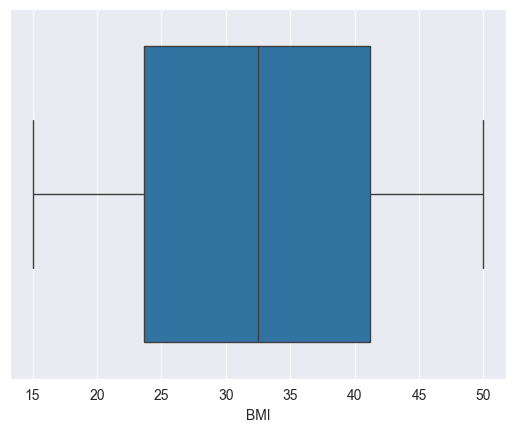

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["BMI"])
plt.show()


In [43]:
Sex=df.groupby(df['Sex'])['Stroke'].sum()
data_sex=pd.DataFrame({'labels':Sex.index, 'values':Sex.values})
fig=px.pie(data_sex, values='values', names='labels',title="Stroke by Gender",color=['Female','Male'],color_discrete_map={"Female":'lightpink',"Male":'lightskyblue'})
fig.show()


In [44]:
work=df.groupby(df['Work_Type'])['Stroke'].sum()
data_work=pd.DataFrame({'labels':work.index, 'values':work.values})
fig=px.pie(data_work, values='values', names='labels',title="Stroke by Work Type")
fig.show()


In [45]:
smoke=df.groupby(df['Smoking_Status'])['Stroke'].sum()
data_smoke=pd.DataFrame({'labels':smoke.index, 'values':smoke.values})
fig=px.pie(data_smoke, values='values', names='labels',title="Stroke by Smoking Status")
fig.show()


In [46]:
residence=df.groupby(df['Residence_Type'])['Stroke'].sum()
data_residence=pd.DataFrame({'labels':residence.index, 'values':residence.values})
fig=px.pie(data_residence, values='values', names='labels',title="Stroke by Residence Type")
fig.show()


In [47]:
married=df.groupby(df['Ever_Married'])['Stroke'].sum()
data_married=pd.DataFrame({'labels':married.index, 'values':married.values})
fig=px.pie(data_married, values='values', names='labels',title="Stroke by Marital Status")
fig.show()


**Feature Selection**

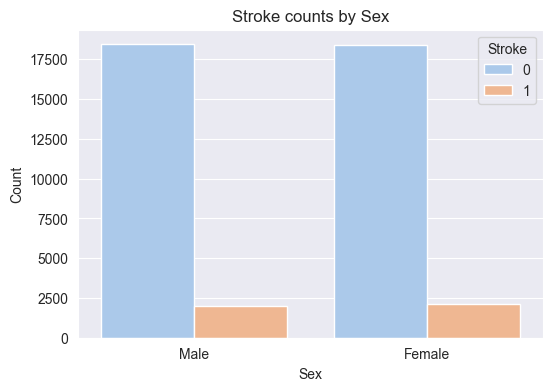

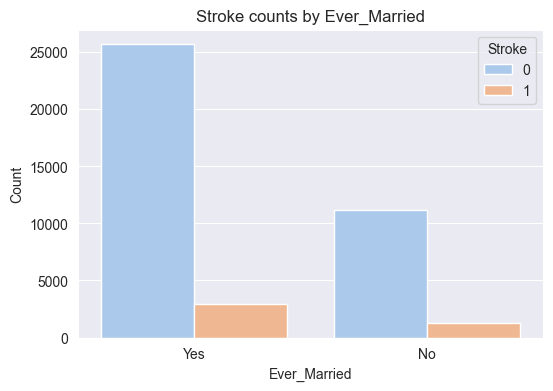

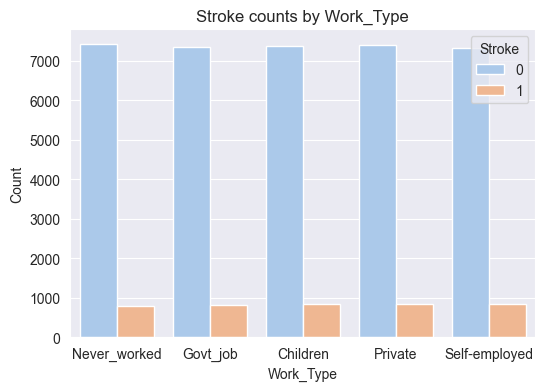

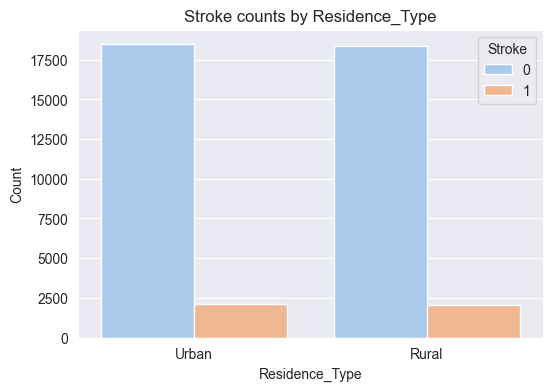

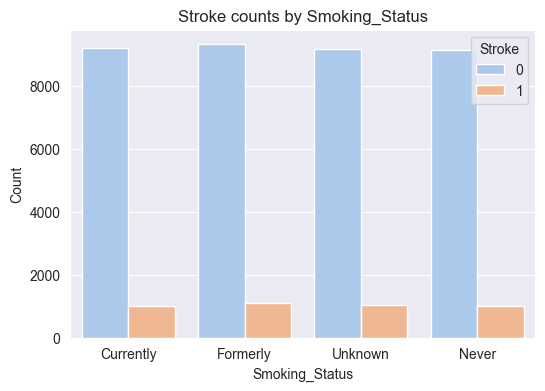

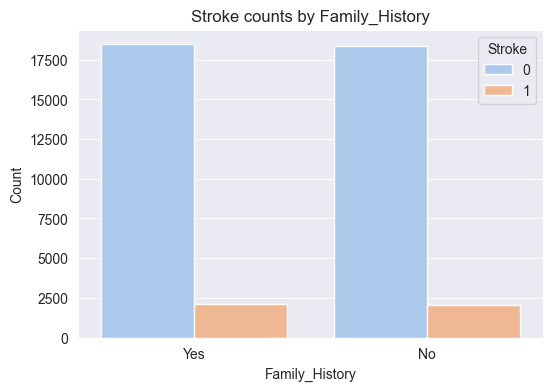

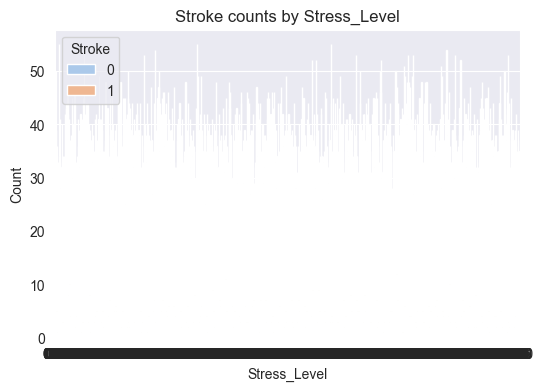

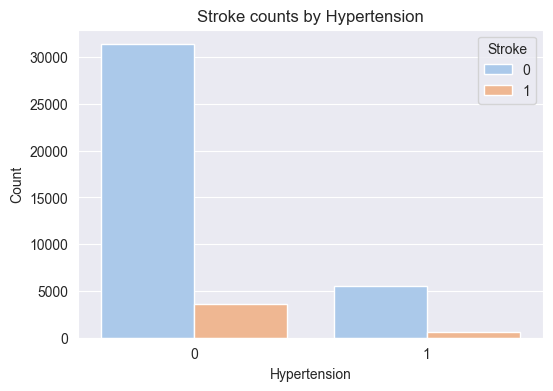

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# List categorical columns
categorical_cols = ["Sex", "Ever_Married", "Work_Type", "Residence_Type", "Smoking_Status", "Family_History","Stress_Level","Hypertension"]

# Plot countplots for each categorical feature against Stroke
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Stroke", data=df, palette="pastel")
    plt.title(f"Stroke counts by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


**Dropping Irrelevant Features**

In [49]:
df=df.drop(['Ever_Married'], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    41000 non-null  int64  
 1   Sex                    41000 non-null  object 
 2   Hypertension           41000 non-null  int64  
 3   Heart_Disease          41000 non-null  int64  
 4   Work_Type              41000 non-null  object 
 5   Residence_Type         41000 non-null  object 
 6   Average_Glucose_Level  41000 non-null  float64
 7   BMI                    41000 non-null  float64
 8   Smoking_Status         41000 non-null  object 
 9   Physical_Activity      41000 non-null  int64  
 10  Alcohol_Intake         41000 non-null  int64  
 11  Stress_Level           41000 non-null  float64
 12  Blood_Pressure         41000 non-null  int64  
 13  Cholesterol            41000 non-null  int64  
 14  Family_History         41000 non-null  object 
 15  MR

**Encoding Categorical Variables**

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Family_History'] = label_encoder.fit_transform(df['Family_History'])
df['Family_History'].unique()

array([1, 0])

In [52]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts()

Sex
0    20554
1    20446
Name: count, dtype: int64

In [53]:
df['Smoking_Status'] = label_encoder.fit_transform(df['Smoking_Status'])
df['Smoking_Status'].value_counts()

Smoking_Status
1    10420
0    10216
3    10202
2    10162
Name: count, dtype: int64

In [54]:
df['Work_Type'] = label_encoder.fit_transform(df['Work_Type'])
df['Work_Type'].value_counts()

Work_Type
3    8243
2    8219
0    8207
1    8181
4    8150
Name: count, dtype: int64

In [55]:
df['Residence_Type'] = label_encoder.fit_transform(df['Residence_Type'])
df['Residence_Type'].value_counts()

Residence_Type
1    20571
0    20429
Name: count, dtype: int64

In [56]:
df.head()

Age  Sex  Hypertension  Heart_Disease  Work_Type  Residence_Type  \
0   69    1             0              0          2               1   
1   32    1             0              1          1               1   
2   89    0             0              0          2               1   
3   78    0             0              0          2               0   
4   38    0             0              0          0               1   

   Average_Glucose_Level    BMI  Smoking_Status  Physical_Activity  \
0                 153.40  17.93               0                 38   
1                 158.33  40.75               0                101   
2                  73.54  16.81               1                 43   
3                 290.89  29.79               1                 92   
4                  91.85  49.86               3                119   

   Alcohol_Intake  Stress_Level  Blood_Pressure  Cholesterol  Family_History  \
0               8          6.62             195          158               1   
1               0          1.38              93          232               1   
2               3          2.34             133          257               0   
3               2          6.13             199          211               1   
4               7          2.57             103          229               1   

   MRI_Result  Stroke  
0        5.28       0  
1       10.81       0  
2       77.31       1  
3       48.68       0  
4       86.56       0

**Correlation Analysis**

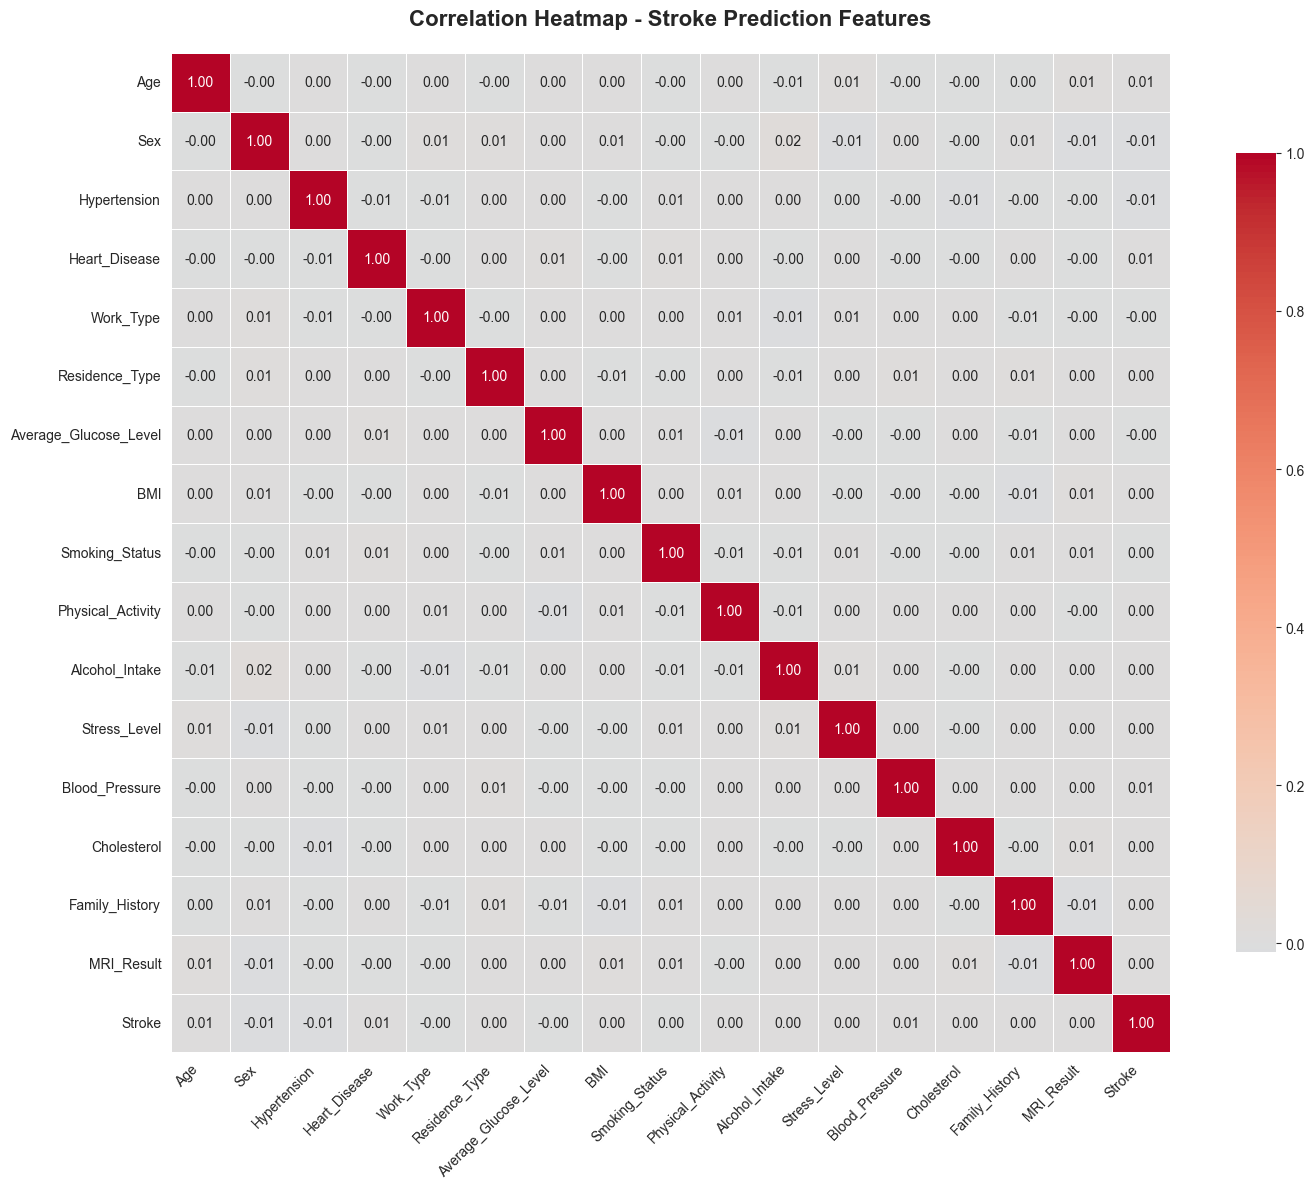

Correlation with Stroke (Target Variable):
Blood_Pressure           :  0.008
Heart_Disease            :  0.007
Age                      :  0.006
Physical_Activity        :  0.005
Cholesterol              :  0.005
Stress_Level             :  0.004
Residence_Type           :  0.004
MRI_Result               :  0.003
Family_History           :  0.003
Alcohol_Intake           :  0.003
BMI                      :  0.002
Smoking_Status           :  0.000
Work_Type                : -0.000
Average_Glucose_Level    : -0.003
Sex                      : -0.008
Hypertension             : -0.010


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5)

plt.title('Correlation Heatmap - Stroke Prediction Features',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlation with Stroke target variable
print("Correlation with Stroke (Target Variable):")
print("=" * 50)
stroke_corr = correlation_matrix['Stroke'].sort_values(ascending=False)
for feature, corr in stroke_corr.items():
    if feature != 'Stroke':
        print(f"{feature:25s}: {corr:6.3f}")



In [58]:
# Save to CSV
df.to_csv(r"../preprocessed_stroke_data.csv",index=False)